In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv('Algerian_cleaned.csv')
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [5]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0','day','month','year'],axis=1,inplace=True)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## Features:
x = df.drop('FWI',axis=1)
y = df['FWI']

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [47]:
x_train.shape,x_test.shape

((182, 11), (61, 11))

In [48]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname =  corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [49]:
corr_features = correlation(x_train,0.85)
corr_features

{'BUI', 'DC'}

In [50]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)

## Feature scaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [61]:
x_train_scaled=pd.DataFrame(x_train_scaled)

In [63]:
x_train_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.842842,0.783080,1.299720,-0.337274,-0.128056,-0.882729,-0.629633,-1.104315,-0.989071
1,-0.301758,0.649508,-0.598748,-0.290487,-1.217586,-0.866876,-0.930585,-1.104315,1.011050
2,2.133120,-2.088702,-0.219054,-0.384060,1.157031,0.615402,2.727139,0.905539,1.011050
3,-0.031216,-0.151919,0.920027,-0.243701,-0.037262,-0.272379,-0.606483,-1.104315,-0.989071
4,-0.031216,-1.020132,-0.598748,-0.056555,-0.009325,-0.605297,-0.699084,-1.104315,-0.989071


### Boxplots to understand effect of standard scaler

TypeError: boxplot() missing 1 required positional argument: 'x'

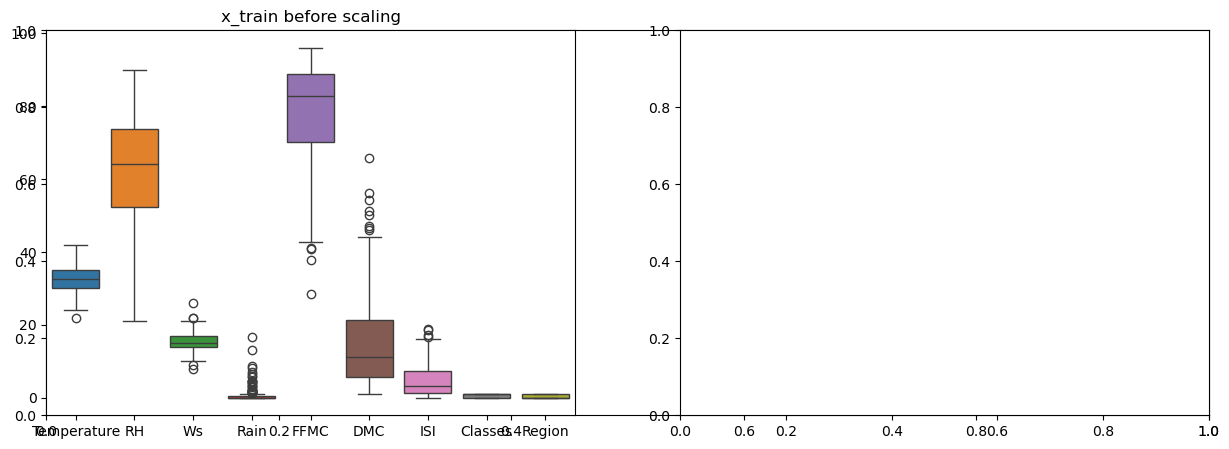

In [62]:
plt.subplots(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scaling')

plt.subplot(1,2,2)
plt.boxplot(data=x_train_scaled)
plt.title('x_train after scaling')

## Linear Regression model

In [78]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score
linreg= LinearRegression()

In [72]:
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)

In [73]:
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

(0.5468236465249977, 0.9847657384266952)

## Lasso Regression

In [75]:
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred_lasso=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
mae,score

(1.1331759949144087, 0.9492020263112388)

In [76]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred_ridge=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
mae,score

(0.5642305340105683, 0.9842993364555513)

In [79]:
elastic=ElasticNet()
elastic.fit(x_train_scaled,y_train)
y_pred_el=elastic.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred_el)
score=r2_score(y_test,y_pred_el)
mae,score

(1.8822353634896, 0.8753460589519703)

## Pickling

In [80]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

Ridge is used for pickling as it has the highest r2 score thus implying highest accuracy but linear model wasn't chosen as it has a high chnace of overfiiting which is by default eliminated in the case of Ridge